Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

UCR Dataset Example

In [1]:
"""
Initial config
"""
import os

# Navigate to correct directory
print(os.getcwd())
if os.getcwd().endswith("notebooks"):
    os.chdir("../")
print(os.getcwd())

# Setup auto reload of source code changes
%load_ext autoreload
%autoreload 2

/Volumes/workplace/JE-Workspace/src/MILTimeSeriesClassification/notebooks
/Volumes/workplace/JE-Workspace/src/MILTimeSeriesClassification


In [2]:
"""
Load UCR Fish dataset
"""
from millet.data.ucr_2018_dataset import UCRDataset

# For this to work, you need to have download the UCR archive from https://www.cs.ucr.edu/~eamonn/time_series_data_2018/.
# Files are expected to be on the path data/UCR/<dataset_name>/<dataset_name>_<split>.tsv
# E.g. for this example using the Fish dataset, you need data/UCR/Fish/Fish_TRAIN.tsv and data/UCR/Fish/Fish_TEST.tsv
train_dataset = UCRDataset("Fish", "train")
test_dataset = UCRDataset("Fish", "test")
print("Train Size:", len(train_dataset))
print("Test Size:", len(test_dataset))
print("Number of classes:", train_dataset.n_clz)
print("Time Series length:", len(train_dataset.get_bag(0)))

Train Size: 175
Test Size: 175
Number of classes: 7
Time Series length: 463


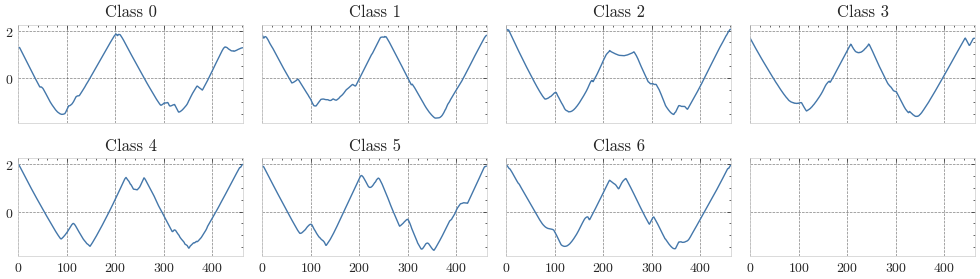

In [3]:
"""
Plot one example per class from Fish
"""
from matplotlib import pyplot as plt

# Need to keep scienceplots imported for matplotlib styling even though the import is never used directly
# noinspection PyUnresolvedReferences
import scienceplots

# Configure matplotlib style
plt.style.use(["science", "bright", "no-latex", "grid"])


def plot_fish_examples(dataset: UCRDataset):
    _, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 3), sharex=True, sharey=True)
    for clz in range(dataset.n_clz):
        # Get a random example for this class
        idx_clz = dataset.get_n_idxs(1, clz=clz, shuffle=True)
        ts = dataset.get_bag(idx_clz)
        # Plot time series
        axis = axes[clz // 4, clz % 4]
        axis.plot(ts)
        axis.set_xlim(0, len(ts))
        axis.set_title("Class {:d}".format(clz))


plot_fish_examples(train_dataset)
plt.tight_layout()